# Martiñón Luna Jonathan José
## Licenciatura en Ciencia de datos
## Datos Masivos II
### Mini-proyecto unidad 2
#### Noviembre 6, 2020

**Objetivo del mini-proyecto**: 

Implementar el código del algoritmo FP-Tree en una libreta usando python.
Requisitos:
- La identificación de los elementos frecuentes deberá realizarse con al menos dos valores de soporte diferentes describiendo qué observaste y si se repitió algún conjunto de elementos.
- El código debe estar debidamente documentado y funcionando.
- Para la identificación de los elementos frecuentes deberás usar la siguiente base de datos: Groceries dataset

# Sobre los datos.

- Conjunto usado para identificar reglas de asociación entre productos y uso de algoritmo apriori.
- 38,765 registros de compras.
- 3 columnas: Member_number **(int)**, Date **(Date)**, itemDescription **(Str)**
- 3898 Números únicos de miembros
- 728 Fechas distintas
- 167 productos distintos
- No existen datos faltantes

# Explorando los datos

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from time import time

In [2]:
data = pd.read_csv('./Groceries_dataset.csv')

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
data.shape

(38765, 3)

In [5]:
data.dtypes #Hay que ajustar los datos de ''Date'' a tipo fecha 

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [6]:
print(f"De los {data.shape[0]} contamos con {len(data.Member_number.unique())} miembros únicos, {len(data.Date.unique())} Fechas distintas y {len(data.itemDescription.unique())}.")

De los 38765 contamos con 3898 miembros únicos, 728 Fechas distintas y 167.


In [7]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

# Preparando los datos

**Convirtiendo a datetime**

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

In [9]:
data.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

**Agruparemos por Número de miembro y día,para obtener el ticket de compra como tal**.

In [10]:
group_data = data.groupby(['Date','Member_number']).agg(lambda x: list(x))

In [11]:
group_data

itemDescription
Date       Member_number                                          
2014-01-01 1249                             [citrus fruit, coffee]
           1381                                       [curd, soda]
           1440                         [other vegetables, yogurt]
           1659           [specialty chocolate, frozen vegetables]
           1789                          [hamburger meat, candles]
...                                                            ...
2015-12-30 3738                                    [onions, flour]
           3971                        [brown bread, bottled beer]
           4058                     [domestic eggs, cream cheese ]
           4565                         [canned beer, canned beer]
           4863                                    [dessert, curd]

[14963 rows x 1 columns]

In [12]:
type(group_data)

pandas.core.frame.DataFrame

**Eliminamos nuestro multi-index para regresar de DataFrameGroupby a Dataframe**

In [13]:
prep_data = group_data.reset_index()

In [14]:
prep_data.head()

,Date,Member_number,itemDescription
0,2014-01-01,1249,"[citrus fruit, coffee]"
1,2014-01-01,1381,"[curd, soda]"
2,2014-01-01,1440,"[other vegetables, yogurt]"
3,2014-01-01,1659,"[specialty chocolate, frozen vegetables]"
4,2014-01-01,1789,"[hamburger meat, candles]"


In [15]:
type(prep_data)

pandas.core.frame.DataFrame

In [16]:
prep_data.dtypes

Date               datetime64[ns]
Member_number               int64
itemDescription            object
dtype: object

**Realmente no necesitamos ni fecha, ni el número de miembro; lo único que nos interesa es la compra como tal, por lo que nuestro Dataframe Final sólo tendra las compras**

In [17]:
new_data = pd.DataFrame(data={'Compra':prep_data['itemDescription']}) 

In [18]:
new_data.head()

,Compra
0,"[citrus fruit, coffee]"
1,"[curd, soda]"
2,"[other vegetables, yogurt]"
3,"[specialty chocolate, frozen vegetables]"
4,"[hamburger meat, candles]"


**Se notó la presencia de elementos repetidos, por lo que se porcedió a limpiarlos. Nos importan los elementos únicos, no las cantidades.**

In [19]:
data_clean = pd.DataFrame(data = {'Compra':new_data['Compra'].apply(set)})
data_clean = data_clean['Compra'].apply(list).to_frame()

In [20]:
data_clean.head()

,Compra
0,"[citrus fruit, coffee]"
1,"[soda, curd]"
2,"[other vegetables, yogurt]"
3,"[specialty chocolate, frozen vegetables]"
4,"[candles, hamburger meat]"


## En este punto ya contamos con nuestros tickets completos y sin repeticiones

In [21]:
def Cuenta_Max(compras):
    '''
    @Autor: 
    Jonathan Martiñón
    
    @Descripción:
    Función auxiliar encargada de recibir una lista de listas y 
    devolver la longitud de la lista más grande, sus elementos y
    la posición en la que se encontró
    
    @Parámetros:
    
    compras      Lista de listas que contiene diversas compras.   LIST
    
    @Ejemplo:
    
    #Lista con 3 compras (listas):
    compras = [ ['Aguacate','Lechuga','Jitomate'], ['Agua'], ['Refresco','Chocolates'] ]
    
    Cuenta_Max(compras)
    >>> (3,['Aguacate','Lechuga','Jitomate'],0)
    
    '''
    maximo = 0
    ticket = ''
    for i in range(len(compras)):
        if len(compras[i]) > maximo:
            maximo = len(compras[i])
            ticket = compras[i]
            k = i
    return maximo, ticket,k

In [22]:
aux = Cuenta_Max(data_clean['Compra'])

In [23]:
print(f"Anteriormente teníamos: {data.shape[0]} ventas individuales registradas")
print(f"Ahora contamos con: {data_clean.shape[0]} tickets de compras agrupadas.\n")

print(f"La compra más grande fue de: {aux[0]} elementos\nSe compraron:\n{aux[1]}")

Anteriormente teníamos: 38765 ventas individuales registradas
Ahora contamos con: 14963 tickets de compras agrupadas.

La compra más grande fue de: 10 elementos
Se compraron:
['specialty bar', 'other vegetables', 'beverages', 'sausage', 'pip fruit', 'rolls/buns', 'curd', 'soft cheese', 'newspapers', 'yogurt']


### Teniendo en cuenta que el mayor número de productos juntos que se compraron fueron 10, y por lógica el menor debía ser 1, se graficó la distribución de las ventas

In [24]:
ventas =[]
for venta in data_clean['Compra']:
    ventas.append(len(venta))

In [25]:
ventas = Counter(ventas)

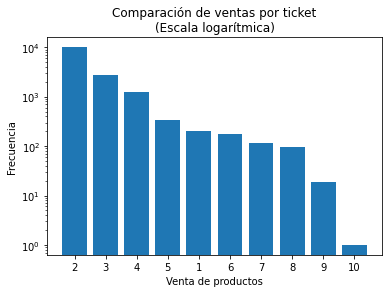

In [26]:
fig, ax = plt.subplots()

idx = np.argsort(list(ventas.values()))[::-1]

vent = np.fromiter(ventas.values(),int)
key = np.fromiter(ventas.keys(),int).astype(str)

plt.bar(key[idx],vent[idx])
plt.yscale('log')
plt.xticks(key[idx])
plt.title('Comparación de ventas por ticket\n(Escala logarítmica)')
plt.xlabel('Venta de productos')
plt.ylabel('Frecuencia')
plt.show()

In [27]:
ventas

Counter({2: 10012,
         3: 2727,
         4: 1273,
         1: 205,
         6: 179,
         5: 338,
         8: 96,
         9: 19,
         7: 113,
         10: 1})

### De igual forma procedimos con los productos

In [28]:
prod = Counter(data['itemDescription'])

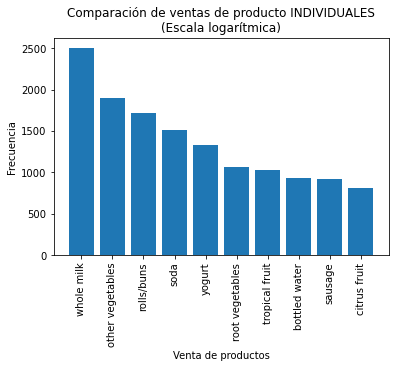

In [29]:
fig, ax = plt.subplots()

productos = prod.most_common(10)

p = [x for x,_ in productos]
v = [x for _,x in productos]
plt.bar(p,v)
# plt.yscale('log')
plt.xticks(p,rotation=90)
plt.title('Comparación de ventas de producto INDIVIDUALES\n(Escala logarítmica)')
plt.xlabel('Venta de productos')
plt.ylabel('Frecuencia')
plt.show()

In [30]:
productos

[('whole milk', 2502),
 ('other vegetables', 1898),
 ('rolls/buns', 1716),
 ('soda', 1514),
 ('yogurt', 1334),
 ('root vegetables', 1071),
 ('tropical fruit', 1032),
 ('bottled water', 933),
 ('sausage', 924),
 ('citrus fruit', 812)]

# Realizando el algoritmo
Una vez que exploramos, limpiamos y nos familiarizamos con los datos, procederemos a aplicar el algoritmo de FP-Tree

In [31]:
data_clean.head()

,Compra
0,"[citrus fruit, coffee]"
1,"[soda, curd]"
2,"[other vegetables, yogurt]"
3,"[specialty chocolate, frozen vegetables]"
4,"[candles, hamburger meat]"


In [32]:
def Elemento_en_lista(l1,l2):
    '''
    @Author:
    Jonathan Martiñón
    
    @Descripción:
    Función que recibe 2 listas y realiza una comparación entre
    ellas para ver si tiene al menos 1 elemento en común con 
    la otra lista. En caso afirmativo devolverá un TRUE. 
    No será necesario evaluar toda la lista en caso de existir
    un valor común, al encontrar el primero, devolverá True y 
    romperá el ciclo.
    
    @Parámetros:
    l1        Lista con valores a verificar                    LIST
    l2        Lista base dónde queremos identificar valores    LIST
    
    @Ejemplo:
    ---------------------------
    l1 = [1,2,3]
    l2 = ['a','b',2]
    
    Elemento_en_lista(l1,l2)
    >>> True
    
    --------------------------
    
    l1 = [1,2,3]
    l2 = ['a','b','c']
    
    Elemento_en_lista(l1,l2)
    >>> False
    ---------------------------
    '''
    
    for element in l1:
        if element in l2:
            return True
    return False
    

In [33]:
def Fp_Tree(datos,min_sup):
    '''
    @Autor:
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de aplicar el algoritmo FP-Tree a partir de
    una lista de compras y un soporte mínimo.
    Devuelve el tiempo de ejecución y un dataframe con las compras
    ordenadas que cumplieron con el soporte
    
    @Parámetros:
    datos       Lista de compras        LIST
    min_sup     Soporte mínimo          FLOAT
    
    @Ejemplo:
    datos=[['Leche','Pan'],['Huevos','Leche'],['Leche'],['Harina','Pan'],['Mantequilla','Sopa']]
    
    Fp_Tree(datos = datos,min_sup=0.4)
    
    >>>(  Compras Frecuentes
         0       [Leche, Pan]
         1            [Leche]
         2            [Leche]
         3              [Pan],
         0.023)
    '''
    
    start_time = time() # Contaremos el tiempo que tarde
    
    Freqs = Counter()
    for compra in datos:    
        Freqs.update(compra)
        
    data_aux = pd.DataFrame(data={'item':list(Freqs.keys()),'Freq':list(Freqs.values())})
    
    aux = []
    for freq in data_aux['Freq']:
        aux.append(freq/len(datos))
        
    data_aux['Min_sup'] = aux
    
    aux = data_aux[data_aux['Min_sup']>=min_sup]
    
    aux = aux.sort_values(by = ['Min_sup'],ascending=False).reset_index(drop=True)
    
    prod_Freqs = list(aux['item'])
    
    new_Freqs = pd.DataFrame(columns=['Compras Frecuentes'])

    for compra in datos:

        # Si nuestra lista contiene al menos un elemento frecuente
        # procedemos a analizarlo, de otra forma no tiene sentido.
        
        if Elemento_en_lista(compra,prod_Freqs,):
            
            p = [] #Posición
            v = [] #Valor
            
            for producto in compra:
                

                if producto in prod_Freqs:

                    p.append(prod_Freqs.index(producto)) # Almacenamos su posición
                    
                    v.append(producto) # Almacenamos su valor
            
            idx = np.argsort(p)
            
            new_Freqs.loc[len(new_Freqs)] = [np.array(v)[idx]]
    
    return new_Freqs, round(time() - start_time,3)

# Probando el algoritmo con soportes 0. 1, 0.01, 0.05, 0.08

In [34]:
Aux = Fp_Tree(data_clean['Compra'],0.1)
aux = Cuenta_Max(Aux[0]['Compras Frecuentes'])

print(f"Tardó {Aux[1]} segundos")
print(f"Se encontraron {Aux[0].shape[0]} elementos que cumplen el soporte")
print(f"La compra más grande fue de: {aux[0]} elementos\nSe compraron:\n{aux[1]}")
Aux[0].head(10)

Tardó 11.499 segundos
Se encontraron 5265 elementos que cumplen el soporte
La compra más grande fue de: 3 elementos
Se compraron:
['whole milk' 'other vegetables' 'rolls/buns']


,Compras Frecuentes
0,[other vegetables]
1,[other vegetables]
2,[whole milk]
3,[whole milk]
4,[other vegetables]
5,[other vegetables]
6,[rolls/buns]
7,[whole milk]
8,"[whole milk, rolls/buns]"
9,[whole milk]


In [35]:
Aux = Fp_Tree(data_clean['Compra'],0.01)
aux = Cuenta_Max(Aux[0]['Compras Frecuentes'])

print(f"Tardó {Aux[1]} segundos")
print(f"Se encontraron {Aux[0].shape[0]} elementos que cumplen el soporte")
print(f"La compra más grande fue de: {aux[0]} elementos\nSe compraron:\n{aux[1]}")
Aux[0].head(10)

Tardó 36.585 segundos
Se encontraron 14779 elementos que cumplen el soporte
La compra más grande fue de: 10 elementos
Se compraron:
['other vegetables' 'rolls/buns' 'yogurt' 'sausage' 'pip fruit'
 'newspapers' 'curd' 'beverages' 'specialty bar' 'soft cheese']


,Compras Frecuentes
0,"[citrus fruit, coffee]"
1,"[soda, curd]"
2,"[other vegetables, yogurt]"
3,"[frozen vegetables, specialty chocolate]"
4,[hamburger meat]
5,"[other vegetables, tropical fruit]"
6,"[bottled water, sausage]"
7,[bottled water]
8,[shopping bags]
9,"[bottled water, sliced cheese]"


In [36]:
Aux = Fp_Tree(data_clean['Compra'],0.05)
aux = Cuenta_Max(Aux[0]['Compras Frecuentes'])

print(f"Tardó {Aux[1]} segundos")
print(f"Se encontraron {Aux[0].shape[0]} elementos que cumplen el soporte")
print(f"La compra más grande fue de: {aux[0]} elementos\nSe compraron:\n{aux[1]}")
Aux[0].head(10)

Tardó 23.448 segundos
Se encontraron 10174 elementos que cumplen el soporte
La compra más grande fue de: 6 elementos
Se compraron:
['whole milk' 'other vegetables' 'rolls/buns' 'soda' 'sausage' 'pastry']


,Compras Frecuentes
0,[citrus fruit]
1,[soda]
2,"[other vegetables, yogurt]"
3,"[other vegetables, tropical fruit]"
4,"[bottled water, sausage]"
5,[bottled water]
6,[bottled water]
7,[yogurt]
8,[whole milk]
9,[bottled water]


In [37]:
Aux = Fp_Tree(data_clean['Compra'],0.08)
aux = Cuenta_Max(Aux[0]['Compras Frecuentes'])

print(f"Tardó {Aux[1]} segundos")
print(f"Se encontraron {Aux[0].shape[0]} elementos que cumplen el soporte")
print(f"La compra más grande fue de: {aux[0]} elementos\nSe compraron:\n{aux[1]}")
Aux[0].head(10)

Tardó 18.565 segundos
Se encontraron 7186 elementos que cumplen el soporte
La compra más grande fue de: 4 elementos
Se compraron:
['whole milk' 'rolls/buns' 'soda' 'yogurt']


,Compras Frecuentes
0,[soda]
1,"[other vegetables, yogurt]"
2,[other vegetables]
3,[yogurt]
4,[whole milk]
5,[whole milk]
6,"[other vegetables, yogurt]"
7,[yogurt]
8,[soda]
9,[other vegetables]
